In [1]:
### If testing, data is randomly generated, and plots are not saved.
### For performing the analysis with actual data, set TEST = False.
TEST = True 

Figure 3A: Cumulative Impulse Responses of individual EMIs

Bonferroni corrected T Test results (corrected for 4 tests)
EMI-I: T=-1.4721459938601724, p=0.6524126452832852, df=14
EMI-II: T=-1.9538465002128207, p=0.28398726168887634, df=14
EMI-III: T=-1.450020724942946, p=0.6763397810298344, df=14
With company: T=0.4043343157994398, p=2.768305172177868, df=14


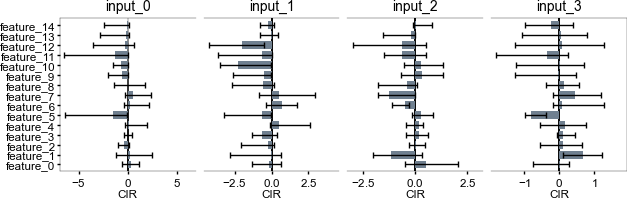

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from ctrl.discrete_optimal_control import LQR
from ctrl import utils
import numpy as np
import custom_rcparams_paper as crc
import os

if TEST:
    data = utils.generate_random_dataset(10, 50)
else:
    data = utils.load_data()
    os.makedirs('figures', exist_ok=True)
features = data[0]['Xlabs']
intervs = data[0]['Ilabs']
ac = np.zeros((len(data), len(features)))
mc = np.zeros((len(data), len(features)))
emi_IR = np.zeros((len(data), len(intervs), len(features)))

for j in range(len(data)):
    X = data[j]['X']
    A = data[j]['A']
    B = data[j]['B']
    ac[j] = LQR.average_ctrb(A, 15)    
    mc[j] = LQR.modal_ctrb(A)    
    for i in range(len(intervs)):
        emi_IR[j,i] = LQR.impulse_response(A, B[:,i], 100)

with mpl.rc_context({'ytick.labelsize':'small', 'figure.constrained_layout.wspace':0.05}):
    fig, axes = plt.subplots(1,len(intervs), figsize=(6.27,2), sharey=True)
    xlims = [(-5,5), (-5,5), (-10,10), (-5,5)]
    for i, ax in enumerate(axes):
        for j in range(len(features)):
            ax.barh(j, np.median(emi_IR[:,i,j], axis=0), 
                    xerr=np.expand_dims([np.median(emi_IR[:,i,j], axis=0) - np.percentile(emi_IR[:,i,j], 25, axis=0), 
                                         np.percentile(emi_IR[:,i,j], 75, axis=0) - np.median(emi_IR[:,i,j], axis=0)], 1),
                    color=crc.colors.features[j], ecolor=crc.colors.errorbars)
            ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
        ax.set_xlabel('CIR')
        xlim = np.max(np.abs(ax.get_xlim()))
        ax.set_xlim((-xlim, xlim))
        ax.set_yticks(np.arange(len(features)))
        ax.set_yticklabels(features)
        ax.set_ylim((-0.7, len(features)-0.3))
        ax.set_title(intervs[i])
        if i>0:
            ax.spines[['left']].set_visible(False)
            ax.tick_params('y',left=False)
        if i<len(intervs)-1:
            ax.spines[['right']].set_visible(False)
    
    if not TEST:
        plt.savefig('figures/paper/figure3A.png')
        plt.savefig('figures/paper/figure3A.svg')

print('Bonferroni corrected T Test results (corrected for 4 tests)')
ttest = stats.ttest_1samp(np.median(emi_IR[:,0], axis=0), 0)
print(f'EMI-I: T={ttest.statistic}, p={ttest.pvalue*4}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,1], axis=0), 0)
print(f'EMI-II: T={ttest.statistic}, p={ttest.pvalue*4}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,2], axis=0), 0)
print(f'EMI-III: T={ttest.statistic}, p={ttest.pvalue*4}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(emi_IR[:,3], axis=0), 0)
print(f'With company: T={ttest.statistic}, p={ttest.pvalue*4}, df={ttest.df}')

Figure 4B: Impulse Response of input on node with highest median AC

Figure 4C: Impulse Response of input on node with subject-wise highest AC

Figure 4D: Impulse Response of input on node with highest median MC

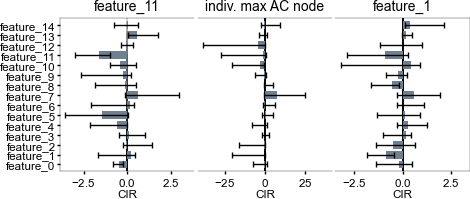

Bonferroni corrected T Test results (corrected for 3 tests)
High AC node: T=-1.3171697392795128, p=0.6268016132866339, df=14
High MC node: T=-0.5887934178884177, p=1.6961384707728984, df=14
Individual highest AC node: T=-0.20503009907244274, p=2.52149904170357, df=14
Comparison between high AC node and individual highest AC node
AC comparison: T=-0.12397891229452862, p=0.9030944087176813, df=14


In [3]:
import matplotlib.pyplot as plt
from scipy import stats
from ctrl.discrete_optimal_control import LQR
from ctrl import utils
import numpy as np
import custom_rcparams_paper as crc
import os

if TEST:
    data = utils.generate_random_dataset(10, 50)
else:
    data = utils.load_data()
    os.makedirs('figures', exist_ok=True)   
features = data[0]['Xlabs']
intervs = data[0]['Ilabs']
ac = np.zeros((len(data), len(features)))
mc = np.zeros((len(data), len(features)))
node_IR = np.zeros((len(data), len(features), len(features)))
individual_highest_AC_node_IR = np.zeros((len(data), len(features)))

for j in range(len(data)):
    X = data[j]['X']
    A = data[j]['A']
    B = np.eye(A.shape[0])
    ac[j] = LQR.average_ctrb(A, 15)    
    mc[j] = LQR.modal_ctrb(A)    
    for i in range(len(features)):
        node_IR[j,i] = LQR.impulse_response(A, -B[:,i], 100)

highest_median_ac = 11 #this is SOC. UNPLEASANT #np.argmax(np.median(ac, axis=0))
highest_median_mc = 1 #this is CHEERFUL #np.argmax(np.median(mc, axis=0))
highest_individual_ac = np.argmax(ac, axis=1)
for i in range(len(data)):
    individual_highest_AC_node_IR[i] = node_IR[i, highest_individual_ac[i]]

fig, axes = plt.subplots(1,3, figsize=(4.7,2), sharey=True)

ax = axes[0]
for j in range(len(features)):
    ax.barh(j, np.median(node_IR[:,highest_median_ac,j], axis=0), 
        xerr=np.expand_dims([np.median(node_IR[:,highest_median_ac,j], axis=0) - np.percentile(node_IR[:,highest_median_ac,j], 25, axis=0), 
                np.percentile(node_IR[:,highest_median_ac,j], 75, axis=0) - np.median(node_IR[:,highest_median_ac,j], axis=0)], 1),
        color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('CIR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title(features[highest_median_ac])
ax.spines[['right']].set_visible(False)

ax = axes[1]
for j in range(len(features)):
    median = np.median(individual_highest_AC_node_IR[:,j], axis=0)
    percentile25 = np.percentile(individual_highest_AC_node_IR[:,j], 25, axis=0)
    percentile75 = np.percentile(individual_highest_AC_node_IR[:,j], 75, axis=0)
    ax.barh(j, median, 
        #     xerr = [median - percentile25, percentile75 - median],
            xerr=np.expand_dims([median - percentile25, percentile75 - median], 1),
            color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('CIR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title('indiv. max AC node')
ax.spines[['left']].set_visible(False)
ax.tick_params('y',left=False)
ax.spines[['right']].set_visible(False)

ax = axes[2]
for j in range(len(features)):
    ax.barh(j, np.median(node_IR[:,highest_median_mc,j], axis=0), 
        xerr=np.expand_dims([np.median(node_IR[:,highest_median_mc,j], axis=0) - np.percentile(node_IR[:,highest_median_mc,j], 25, axis=0), 
                np.percentile(node_IR[:,highest_median_mc,j], 75, axis=0) - np.median(node_IR[:,highest_median_mc,j], axis=0)], 1),
        color=crc.colors.features[j], ecolor=crc.colors.errorbars)
    ax.plot([0,0], ax.get_ylim(), color='black', zorder=-5, linewidth=0.25)
ax.set_xlabel('CIR')
xlim = np.max(np.abs(ax.get_xlim()))
ax.set_xlim((-xlim, xlim))
ax.set_yticks(np.arange(len(features)))
ax.set_yticklabels(features)
ax.set_ylim((-0.7, len(features)-0.3))
ax.set_title(features[highest_median_mc])
ax.spines[['left']].set_visible(False)
ax.tick_params('y',left=False)
plt.show()
if not TEST:
    plt.savefig('figures/paper/figure3B-D.png')
    plt.savefig('figures/paper/figure3B-D.svg')

print('Bonferroni corrected T Test results (corrected for 3 tests)')
ttest = stats.ttest_1samp(np.median(node_IR[:,highest_median_ac], axis=0), 0)
print(f'High AC node: T={ttest.statistic}, p={ttest.pvalue*3}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(node_IR[:,highest_median_mc], axis=0), 0)
print(f'High MC node: T={ttest.statistic}, p={ttest.pvalue*3}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(individual_highest_AC_node_IR, axis=0), 0)
print(f'Individual highest AC node: T={ttest.statistic}, p={ttest.pvalue*3}, df={ttest.df}')
ttest = stats.ttest_1samp(np.median(node_IR[:,np.argmax(np.median(ac, axis=0))], axis=0), 0)

print('Comparison between high AC node and individual highest AC node')
ttest = stats.ttest_rel(np.median(node_IR[:,highest_median_ac], axis=0), np.median(individual_highest_AC_node_IR, axis=0))
print(f'AC comparison: T={ttest.statistic}, p={ttest.pvalue}, df={ttest.df}')